### SQL
#### 1.

##### select count(*) as count, p.name from Passenger p
##### inner join Pass_in_trip t
##### on t.passenger = p.id
##### group by p.name
##### order by count desc, name 

#### 2. 

##### select TIMEDIFF((select end_pair from Timepair
##### where id=4), (SELECT start_pair from Timepair
##### where id=2)) as time

#### 3. 

##### select distinct r.* from Rooms r
##### inner join Reservations rs 
##### on rs.room_id = r.id
##### where week(rs.start_date, 1) = 12 and year(rs.start_date) = 2020

#### 4. 

##### select classroom from Schedule
##### group by classroom
##### having count(id) = (select max(count) from (
##### select count(id) count from Schedule group by classroom) subq)

#### 5.

##### with dates as (select distinct date from income_o),
##### periods as (select date dt1, lead(date) over(order by date) as dt2 from dates)
##### select coalesce(sum(out), 0) amount, dt1, dt2
##### from periods left join outcome_o
##### on outcome_o.date > dt1 and outcome_o.date <= dt2
##### where dt2 is not null
##### group by dt1, dt2

#### 6. 

##### with description as (select row_number() over(order by date, name) number_of_battle, count(*) over() count, name, date from battles)
##### select f.number_of_battle rn_1, f.name name_1, f.date date_1, s.number_of_battle rn_2, s.name name_2, s.date date_2 
##### from description f left join description s
##### on f.number_of_battle = s.number_of_battle - s.count/2 - s.count%2
##### where f.number_of_battle <= f.count/2 + f.count%2

### Математика
#### 1.

###### Из отношения благоприятных событий ко всем возможным (формула вероятности), общее число событий равно 14^6, так как всего было 6 раундов и 14 возможных вариантов попадания волчка в каждом раунде. Так как волчок останавливается только на секторах 1-6, то будет все равно сколько существует секторов до и после 1-6. Примем секторы 0, 7-13 за один целый сектор, тогда вероятность выпадения секторов 1-6 будет равна 1/7 и так как теперь существует 7^6 событий, то вариантов выпадения 1-6 будет равна 7^5. Следовательно, для 14 различных секторов вероятность будет равна 7^5/14^6 = 1/7*2^6 = 1/448

In [1]:
f"Или {round(1/488, 5)}"

'Или 0.00205'

#### 2. 

In [2]:
import math

import scipy.stats as st


def interval_norm(
    n: int = 16, mean: float = 0.08, std: int = 0.04, alpha: float = 0.99
):
    se = math.sqrt(std ** 2 / n)
    interval = st.t.interval(0.99, n - 1, loc=mean, scale=se)
    print(
        "{}%-ый доверительный интервал расположен от {:.4f} до {:.4f}".format(
            int(alpha * 100), interval[0], interval[1]
        )
    )


interval_norm()

99%-ый доверительный интервал расположен от 0.0505 до 0.1095


#### 3.
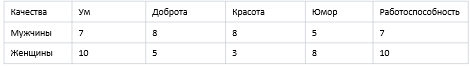

Используется ранговый коэффициент корреляции Спирмена 

In [3]:
from scipy.stats import spearmanr

males = [7, 8, 8, 5, 7]
females = [10, 5, 3, 8, 10]

corr, pvalue = spearmanr(males, females)
print(
    f"Принимается гипотеза о близкой оценке качеств противоположного пола, \
так как p value = {round(pvalue, 2)}"
)

Принимается гипотеза о близкой оценке качеств противоположного пола, так как p value = 0.24


### Основы программирования
#### 1 и 2. 
Как я понял, второй номер мало чем отличается от первого, поэтому код один и тот же.

In [4]:
from typing import List


def indofsum(nums: List[int], target: int) -> List[int]:
    dict_of_nums = dict()
    for i in range(len(nums)):
        if target - nums[i] in dict_of_nums:
            return [dict_of_nums[target - nums[i]], i]
        else:
            dict_of_nums[nums[i]] = i
    return f"Нет элементов массива nums, дающих в сумме {target}"